In [1]:
library(Seurat)
library(Signac)
library(CellChat)
library(patchwork)
library(argparse)
source("/tscc/projects/ps-epigen/users/kdang/eye_final/source_FunFig.R")
library(dplyr)                                                               
library(devtools)
library(hdf5r)
source("/tscc/projects/ps-epigen/bpToolbox/utils.R")

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, t


Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: igraph


Attaching package: ‘igraph’


The following objects are masked from ‘package:dplyr’:

    as_data_frame, groups, union


The following object is masked from ‘package:Seurat’:

    components


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union


Loading required package: ggplot2

Loading required package: usethis

Warning message:
“package ‘hdf5r’ was built under R version 4.4.2”


## Checking saving objs worked

In [2]:
setwd("/tscc/projects/ps-epigen/users/a2jorgensen/sandbox/250225_humanAT2_organoids/data/rds_objs/proper_demux_add/")

sobj_1<- readRDS("JB_1495_w_demux_data.RDS")
sobj_1
unique(colnames(sobj_1@meta.data))
table(sobj_1$DROPLET.TYPE)

sobj_2<- readRDS("JB_1496_w_demux_data.RDS")
sobj_2
unique(colnames(sobj_2@meta.data))
table(sobj_2$DROPLET.TYPE)

sobj_3<- readRDS("JB_1466_w_demux_data.RDS")
sobj_3
unique(colnames(sobj_3@meta.data))
table(sobj_3$DROPLET.TYPE)

In [3]:
sobj<- readRDS("250506_3_libs_w_demux.RDS")
sobj

An object of class Seurat 
33538 features across 4211640 samples within 1 assay 
Active assay: RNA (33538 features, 0 variable features)
 3 layers present: counts.JB_1495_Organoid, counts.JB_1496_Organoid, counts.JB_1466_1_2_Organoid

In [4]:
unique(colnames(sobj@meta.data))

[1] "orig.ident"         "nCount_RNA"         "nFeature_RNA"      
 [4] "INT_ID"             "NUM.SNPS"           "NUM.READS"         
 [7] "DROPLET.TYPE"       "BEST.GUESS"         "BEST.LLK"          
[10] "NEXT.GUESS"         "NEXT.LLK"           "DIFF.LLK.BEST.NEXT"
[13] "BEST.POSTERIOR"     "SNG.POSTERIOR"      "SNG.BEST.GUESS"    
[16] "SNG.BEST.LLK"       "SNG.NEXT.GUESS"     "SNG.NEXT.LLK"      
[19] "SNG.ONLY.POSTERIOR" "DBL.BEST.GUESS"     "DBL.BEST.LLK"      
[22] "DIFF.LLK.SNG.DBL"

In [5]:
table(sobj$DROPLET.TYPE)


   AMB    DBL    SNG 
101173    825  34833 

In [6]:
table(sobj$SNG.BEST.GUESS)


0_0_1_ZBC1 0_0_2_ZBC2 0_0_3_ZBC3 0_0_4_ZBl1 0_0_5_ZBl2 0_0_6_ZBl3 
     83132      20715      13734       9222       6290       3738 

In [7]:
sobj <- subset(sobj, subset = DROPLET.TYPE == "SNG")

Warning message:
“Removing 4074809 cells missing data for vars requested”


Warning message:
“Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead.”
Warning message:
“Removed 65 rows containing non-finite outside the scale range
(`stat_ydensity()`).”
Warning message:
“Removed 65 rows containing missing values or values outside the scale range
(`geom_point()`).”


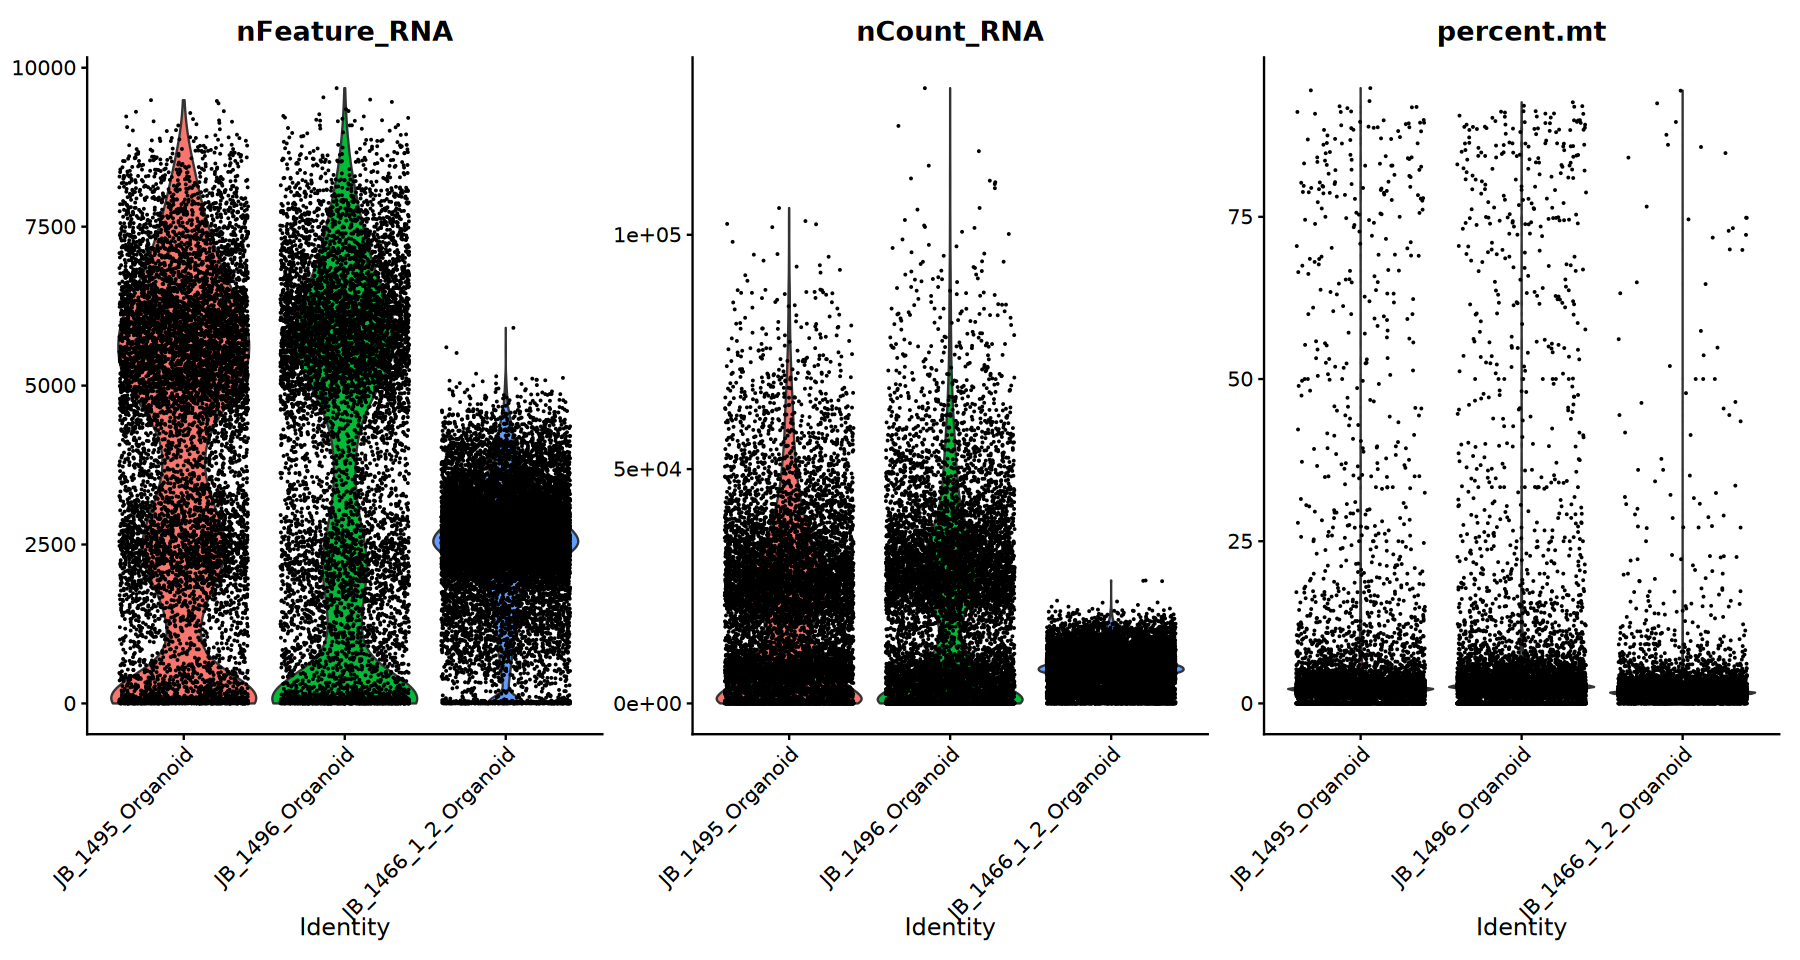

In [8]:
options(repr.plot.width=15, repr.plot.height=8)
sobj[["percent.mt"]] <- PercentageFeatureSet(sobj, pattern = "^MT-")

# Visualize QC metrics as a violin plot
VlnPlot(sobj, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)

In [9]:
sobj

An object of class Seurat 
33538 features across 34833 samples within 1 assay 
Active assay: RNA (33538 features, 0 variable features)
 3 layers present: counts.JB_1495_Organoid, counts.JB_1496_Organoid, counts.JB_1466_1_2_Organoid

In [ ]:
saveRDS(sobj,"/tscc/projects/ps-epigen/users/a2jorgensen/sandbox/250225_humanAT2_organoids/data/rds_objs/proper_demux_add/250507_3_libs_demux_sng.RDS" )